<a href="https://colab.research.google.com/github/magdagucman/programming-for-data/blob/main/worksheets/Project_mregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression - H7
---

Using R, this notebook will investigate the hypothesis 7:

> Total suicide rates can be predicted by unemployment (measured as a total percentage of labour force), poverty (measured by percentage of population living below national income poverty line), inequality (measured by the Coefficient of Human Inequality), accessibility of psychiatrists (measured by the number of psychiatrists working in mental health sector per 100000 people), accessibility of psychiatric hospitals (measured by the number of mental hospitals per 100000 people).


Below is the code to install the necessary packages.

In [8]:
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("fastDummies")

# tidyverse includes dpylr which includes all the functions such as mutate, select, summarise etc
library("tidyverse")

# ggplot2 contains all the visualisation tools (similar to matplotlib)
library("ggplot2")

# displaying in real numbers rather than in scientific form 
options(scipen = 999)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Below I will read the already cleaned and wrangled data into the 'data' variable and display the head of the data, as well as summary, to test whether the process was successfull.**

In [9]:
data <- read_csv("https://raw.githubusercontent.com/magdagucman/programming-for-data/main/Data%20Sets/output.csv")

head(data)
summary(data)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Country = col_character(),
  suicide_female = col_double(),
  suicide_male = col_double(),
  unemployment = col_double(),
  poverty = col_double(),
  inequality = col_double(),
  psychiatrists = col_double(),
  mental_hospitals = col_double(),
  gender_inequality = col_double(),
  suicide_total = col_double(),
  suicide_ratio = col_double()
)




X1,Country,suicide_female,suicide_male,unemployment,poverty,inequality,psychiatrists,mental_hospitals,gender_inequality,suicide_total,suicide_ratio
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,Albania,6.0,9.5,14.1,14.3,12.7,1.83,0.06,0.242,15.5,0.6315789
2,Azerbaijan,1.2,5.1,5.6,6.0,13.4,5.08,0.12,0.313,6.3,0.2352941
5,Benin,9.8,22.1,1.0,40.1,34.3,0.14,0.02,0.625,31.9,0.4434389
6,Bolivia (Plurinational State of),11.0,19.4,2.6,34.6,36.7,1.06,0.09,0.491,30.4,0.5670103
9,Burundi,8.3,22.4,1.8,64.9,36.3,0.01,0.01,0.532,30.7,0.3705357
10,Cambodia,3.6,9.4,0.8,17.7,28.6,0.23,0.00,0.506,13.0,0.3829787


       X1          Country          suicide_female    suicide_male   
 Min.   : 0.00   Length:52          Min.   : 1.200   Min.   : 4.700  
 1st Qu.:19.75   Class :character   1st Qu.: 3.125   1st Qu.: 9.475  
 Median :38.00   Mode  :character   Median : 4.750   Median :14.650  
 Mean   :39.19                      Mean   : 5.292   Mean   :15.537  
 3rd Qu.:57.00                      3rd Qu.: 6.600   3rd Qu.:20.050  
 Max.   :79.00                      Max.   :15.100   Max.   :33.200  
  unemployment       poverty        inequality    psychiatrists   
 Min.   : 0.600   Min.   : 4.10   Min.   : 8.50   Min.   :0.0100  
 1st Qu.: 3.575   1st Qu.:16.85   1st Qu.:18.90   1st Qu.:0.0575  
 Median : 5.300   Median :24.25   Median :25.00   Median :0.3550  
 Mean   : 6.829   Mean   :29.77   Mean   :26.11   Mean   :1.1133  
 3rd Qu.: 9.500   3rd Qu.:41.30   3rd Qu.:33.05   3rd Qu.:1.1425  
 Max.   :22.100   Max.   :70.00   Max.   :44.00   Max.   :9.6100  
 mental_hospitals gender_inequality suici

**The head and summary show that data was retrieved successfully.**

### Visualise target variable (IV)
---

**Below I will visualise the independent variable on a histogram, to initially assess the assumption of normality.**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



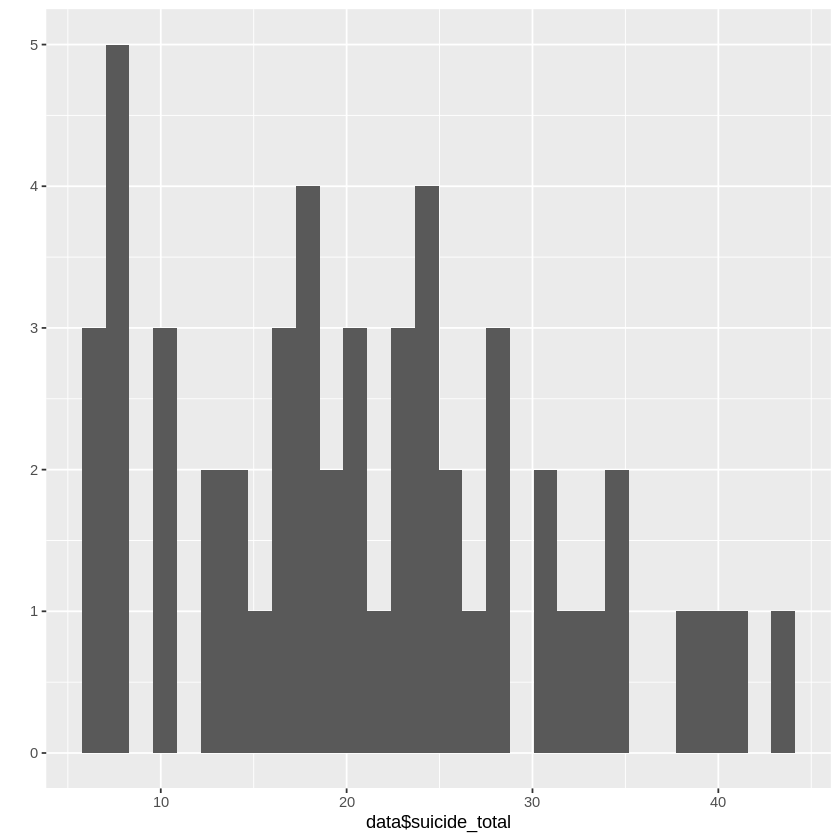

In [5]:
qplot(data$suicide_total, geom="histogram")

**It appears that the model does not meet the assumption of normality - the histogram does not resemble bell curve.**

### Multiple linear regression 
---

**Below I will run a linear regression to see if the target variables predict the total suicides and if they do, then how well.**

In [6]:
regression_model <- lm(suicide_total ~ unemployment + poverty + inequality + psychiatrists  + mental_hospitals, data = data)
summary(regression_model)


Call:
lm(formula = suicide_total ~ unemployment + poverty + inequality + 
    psychiatrists + mental_hospitals, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.853  -6.268  -1.704   5.394  22.590 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)       15.928270   6.528855   2.440   0.0186 *
unemployment       0.043007   0.286730   0.150   0.8814  
poverty            0.164764   0.113604   1.450   0.1537  
inequality         0.008382   0.259130   0.032   0.9743  
psychiatrists      0.197734   1.019968   0.194   0.8471  
mental_hospitals -29.478503  60.233467  -0.489   0.6269  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.83 on 46 degrees of freedom
Multiple R-squared:  0.08637,	Adjusted R-squared:  -0.01294 
F-statistic: 0.8697 on 5 and 46 DF,  p-value: 0.5088


### Summary of results
---
None of the variables significantly predicts life expectancy (no results are statistically significant) and the model does not account for the variance in suicides betweem countries (F statistic is not significant, adjusted R-squared is very low, close to 0).

### Assumptions check
--- 

**Below I will check the assumptions of linearity and normality.**

1. check linearity plot
2. check Q-Q plot 

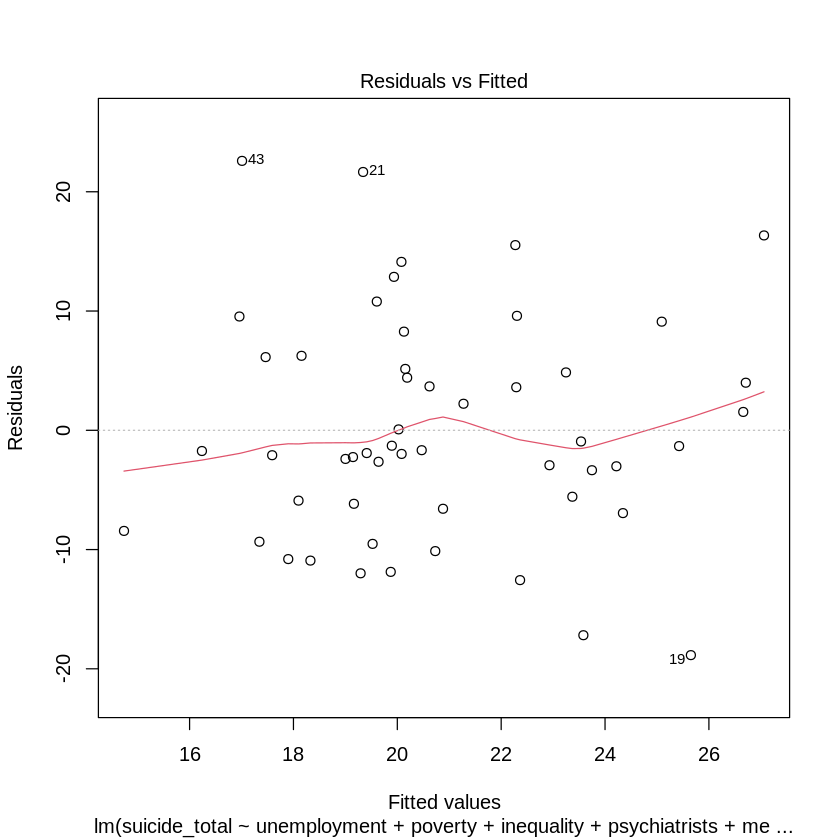

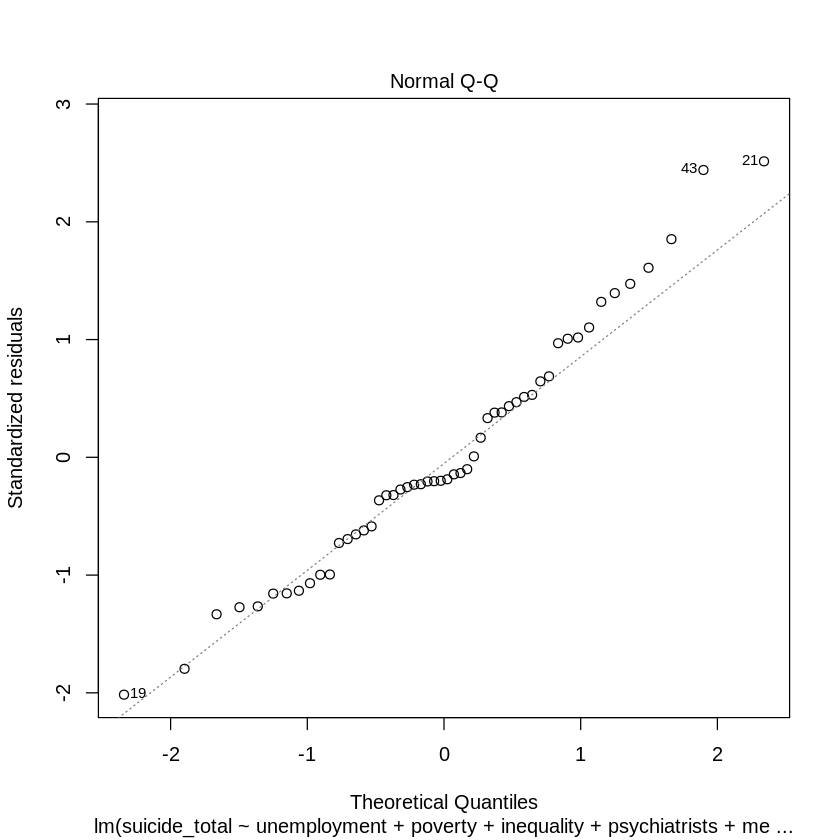

In [7]:
plot(regression_model, 1)
plot(regression_model, 2)

**Looking at the plots, the model seems not to be meeting the assumption of normality and linearity.**

##**Conclusions**

The results show that neither of the chosen dependent variables explains the international variance in suicides. Based on the available UN data it cannot be confirmed that unemployment, poverty, inequality, access to mental health professionals, and access to mental health institutions are good predictors of suicides, and the model build upon these is not statistically significant.

This shows perhaps that the issue of suicides cannot be reduced to a simple model that is not accounting for other factors such as for example cultural differences, occurence of highly stressful life events etc. 

Future studies could focus on including other factors to the model, such as those mentioned above. However, a better way forward would most likely be to gather more detailed data on international suicide victims and their specific circumstances.

**Issues**

One issue was that after removing the rows with null values and the outliers, the final data set became rather small, with only 52 countries left. This might have not been enough to render any meaningful results.

Looking at the linearity and q-q plots, it also seems that the data set might actually not meet these 2 assumptions, rendering the results unreliable.

Another issue is lack of available data for the same year for all the countries (data about mental hospitals and professionals was gathered in 2011, while other - except for poverty, was gathered in 2010; poverty data was gathered between 2008-2019, which seems like a big spread, and there is no information available, which piece of data comes from which year).

Lastly, it is hard to assess how reliable data coming from various countries is.